## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['num'],axis=1)

In [5]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [6]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'num' variable:  ",end=" ")
print(df['num'].unique())

print("Categories in 'exang' variable:",end=" " )
print(df['exang'].unique())

print("Categories in 'fbs' variable:     ",end=" " )
print(df['fbs'].unique())

Categories in 'sex' variable:      [1 0]
Categories in 'num' variable:   [0 1]
Categories in 'exang' variable: [0 1]
Categories in 'fbs' variable:      [1 0]


In [7]:
y = df['num']

In [8]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(303, 13)

In [29]:
from sklearn.impute import SimpleImputer
print("Checking for NaN values in X:")
print(np.isnan(X).sum())

print("Checking for NaN values in y:")
print(np.isnan(y).sum())

# Handle NaN values by imputing
imputer = SimpleImputer(strategy='constant', fill_value=0)
X = imputer.fit_transform(X)

Checking for NaN values in X:
0
Checking for NaN values in y:
0


In [30]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((242, 13), (61, 13))

#### Create an Evaluate Function to give all metrics after model Training

In [31]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3457
- Mean Absolute Error: 0.2734
- R2 Score: 0.5155
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3315
- Mean Absolute Error: 0.2655
- R2 Score: 0.5593


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4966
- Mean Absolute Error: 0.4933
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5062
- Mean Absolute Error: 0.5028
- R2 Score: -0.0273


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3457
- Mean Absolute Error: 0.2735
- R2 Score: 0.5155
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3315
- Mean Absolute Error: 0.2655
- R2 Score: 0.5595


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2974
- Mean Absolute Error: 0.1942
- R2 Score: 0.6415
----------------------

### Results

In [33]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,K-Neighbors Regressor,0.642414
7,CatBoosting Regressor,0.581195
5,Random Forest Regressor,0.576799
2,Ridge,0.559469
0,Linear Regression,0.559317
6,XGBRegressor,0.458984
8,AdaBoost Regressor,0.398968
4,Decision Tree,0.014009
1,Lasso,-0.027252


## Linear Regression

In [34]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 55.93


## Plot y_pred and y_test

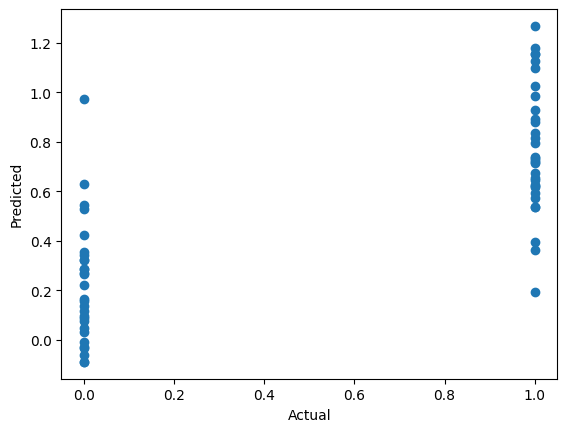

In [35]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

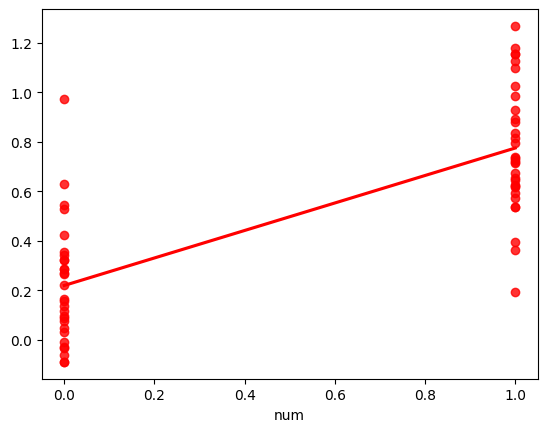

In [36]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [37]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
179,0,0.544088,-0.544088
228,1,0.651911,0.348089
111,1,0.626634,0.373366
246,1,0.536093,0.463907
60,1,0.595024,0.404976
...,...,...,...
249,0,0.031623,-0.031623
104,1,0.928978,0.071022
300,1,0.816481,0.183519
193,1,0.739957,0.260043
